Deep learning algorithm CNN

In [ ]:
!gdown 142wpDRaIVe5l_FOIr_Hxus154IO9WFYh

Downloading...
From: https://drive.google.com/uc?id=142wpDRaIVe5l_FOIr_Hxus154IO9WFYh
To: /content/final_dataset_cnn_df_2.csv
100% 11.6M/11.6M [00:00<00:00, 232MB/s]


In [ ]:
cnn_df = pd.read_csv('final_dataset_cnn_df_2.csv')

In [ ]:
cnn_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df = cnn_df.copy()

In [ ]:
len(df)

27163

In [ ]:
modified_seq = []
modified_genus = []

for i in range(len(df.sequence)):

    if len(df.sequence[i]) >= 200:
        k = df.sequence[i][:100]
        k += 100*'X'
        k +=df.sequence[i][-100:]
        modified_seq.append(k)
        modified_genus.append(df.genus_name[i])

    elif 100 <= len(df.sequence[i]) < 200:
        k = df.sequence[i][:70]
        k += 160*'X'
        k +=df.sequence[i][-70:]
        modified_seq.append(k)
        modified_genus.append(df.genus_name[i])

    elif 40 <= len(df.sequence[i]) < 100:
        k = df.sequence[i][:40]
        k += 220*'X'
        k +=df.sequence[i][-40:]
        modified_seq.append(k)
        modified_genus.append(df.genus_name[i])

    else:
        k = df.sequence[i][:15]
        k += 270*'X'
        k +=df.sequence[i][-15:]
        modified_seq.append(k)
        modified_genus.append(df.genus_name[i])

In [ ]:
len(modified_seq)

25962

In [ ]:
for i in range(len(sequence_balance)):
    sequence_balance[i] = pad_sequence(sequence_balance[i])

In [ ]:
for i in sequence_balance:
    if len(i) != 300:
        print(i)

In [ ]:
# Define a mapping of amino acids to integers
amino_acid_to_int = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9,
                     'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19, 'X' : 20}

# Define a function to one-hot encode a protein sequence
def one_hot_encode(protein_sequence):
    one_hot_encoded = np.zeros((len(protein_sequence), 21)).astype('int64')
    for i, amino_acid in enumerate(protein_sequence):
          one_hot_encoded[i, amino_acid_to_int[amino_acid]] = 1
    return one_hot_encoded

In [ ]:
num_seq = np.array([one_hot_encode(i) for i in modified_seq])

In [ ]:
num_seq.shape

(25962, 300, 21)

In [ ]:
num_seq = num_seq.reshape(num_seq.shape[0],75,84)

In [ ]:
num_seq.shape

(25962, 75, 84)

In [ ]:
num_seq[2000].shape

(75, 84)

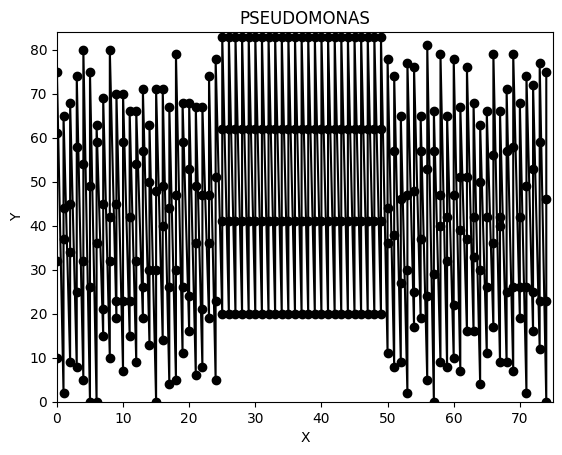

In [ ]:
# Get the coordinates of the non-zero elements
x, y = np.nonzero(num_seq[900])

# Create a line plot joining the points
plt.plot(x, y, 'ko-')

# Set the x and y limits to cover the entire matrix
plt.xlim(0, num_seq[900].shape[0])
plt.ylim(0, num_seq[900].shape[1])

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(modified_genus[12000])

# Display the plot
plt.show()

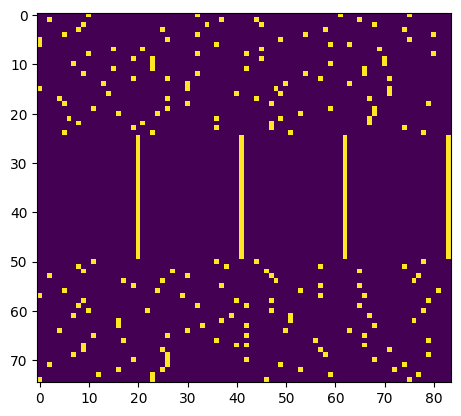

In [ ]:
# Plot the matrix as an image
plt.imshow(num_seq[900], cmap='viridis')
plt.show()

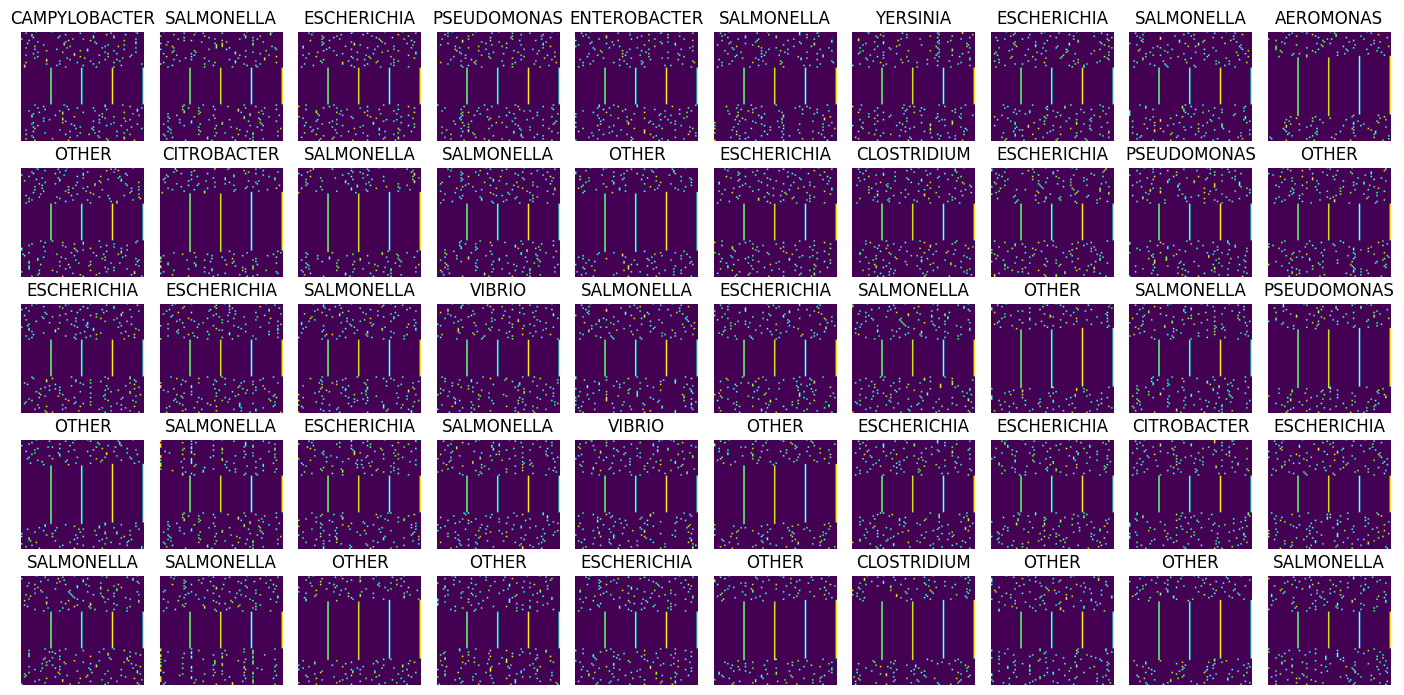

In [ ]:
random_indices = np.random.choice(len(num_seq), size=50, replace=False)

fig, axes = plt.subplots(5, 10, figsize=(14, 7))

# Iterate over the matrices and plot them in subplots
for i, matrix in enumerate(num_seq[random_indices]):
    ax = axes[i % 5, i // 5]  # Get the corresponding subplot axis
    ax.imshow(matrix, cmap='viridis')
    ax.set_title(modified_genus[random_indices[i]])  # Set a title for each subplot
    ax.axis('off')  # Optional: Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
targets = modified_genus #genus_balance
LE = LabelEncoder()
encoded_virus_class = LE.fit_transform(modified_genus)
targets_label = encoded_virus_class

In [ ]:
dict_vir = {}
for i in range(len(encoded_virus_class)):
  dict_vir[encoded_virus_class[i]] = modified_genus[i]

In [ ]:
dict_vir

{19: 'OTHER',
 0: 'ACINETOBACTER',
 1: 'AEROMONAS',
 2: 'ALPHAPROTEOBACTERIA',
 3: 'BACILLUS',
 4: 'BARTONELLA',
 5: 'BORDETELLA',
 6: 'BORRELIA',
 7: 'BRUCELLA',
 8: 'BURKHOLDERIA',
 9: 'CAMPYLOBACTER',
 10: 'CITROBACTER',
 11: 'CLOSTRIDIUM',
 12: 'EDWARDSIELLA',
 13: 'ENTEROBACTER',
 14: 'ESCHERICHIA',
 15: 'HAEMOPHILUS',
 16: 'KLEBSIELLA',
 17: 'LEPTOSPIRA',
 18: 'NEISSERIA',
 20: 'PSEUDOMONAS',
 21: 'SALMONELLA',
 22: 'SHIGELLA',
 23: 'STAPHYLOCOCCUS',
 24: 'STREPTOCOCCUS',
 25: 'VIBRIO',
 26: 'YERSINIA'}

In [ ]:
cnn_dict_vir = {}
for i in range(len(modified_genus)):
    cnn_dict_vir[encoded_virus_class[i]] = modified_genus[i]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
reshaped_data = (pd.DataFrame({'labels': targets})).values.reshape(-1, 1)
encoded_data = encoder.fit_transform(reshaped_data)
encoded_dataframe = pd.DataFrame(encoded_data.toarray().astype('int64').tolist())

In [ ]:
encoded_dataframe

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_seq, encoded_dataframe, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape of the images
input_shape = (75, 84,1)
# Define the model architecture
model = Sequential()
# Add the first convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
# Add a max pooling layer


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# Add another convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (2, 2), activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another max pooling layer
#model.add(MaxPooling2D(pool_size=(3, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a fully connected layer with 128 neurons
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(200, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

#model.add(Dense(200, activation='relu'))

# Add the output layer with 10 neurons (for a classification problem with 10 classes)
model.add(Dense(27, activation='softmax'))
# Compile the model with categorical cross-entropy loss and the Adam optimizer
optimizer_1 = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer_1, metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 74, 83, 32)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 41, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 41, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 40, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 20, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 18, 20, 64)       

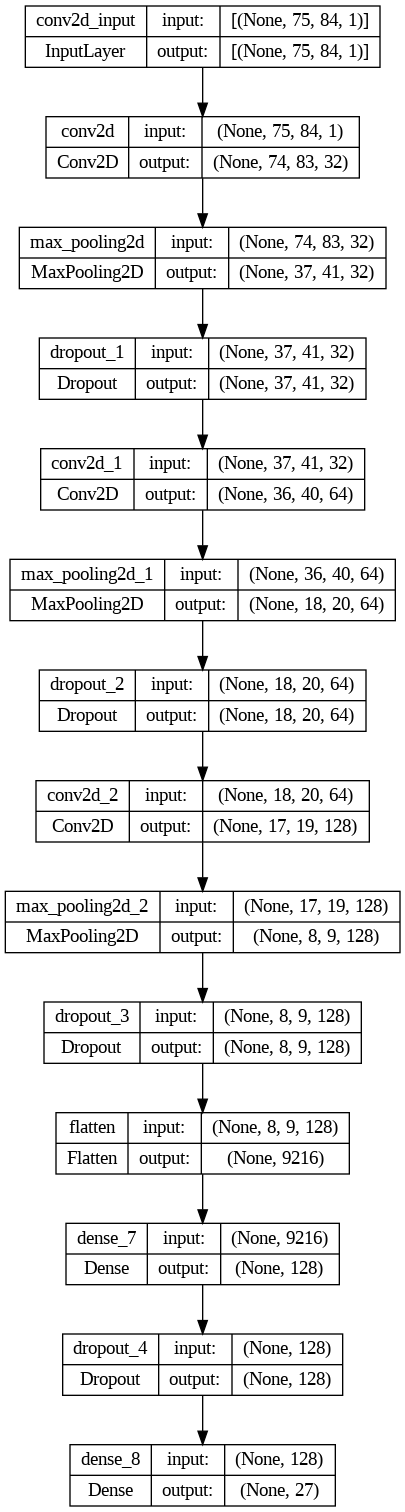

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/200
520/520 [==============================] - 16s 12ms/step - loss: 1.5306 - accuracy: 0.5568 - val_loss: 0.9942 - val_accuracy: 0.7208
Epoch 2/200
520/520 [==============================] - 6s 11ms/step - loss: 0.9128 - accuracy: 0.7403 - val_loss: 0.7143 - val_accuracy: 0.7947
Epoch 3/200
520/520 [==============================] - 5s 10ms/step - loss: 0.7061 - accuracy: 0.7952 - val_loss: 0.6008 - val_accuracy: 0.8281
Epoch 4/200
520/520 [==============================] - 5s 10ms/step - loss: 0.5900 - accuracy: 0.8230 - val_loss: 0.5469 - val_accuracy: 0.8414
Epoch 5/200
520/520 [==============================] - 5s 10ms/step - loss: 0.4993 - accuracy: 0.8473 - val_loss: 0.5144 - val_accuracy: 0.8491
Epoch 6/200
520/520 [==============================] - 6s 11ms/step - loss: 0.4403 - accuracy: 0.8604 - val_loss: 0.5031 - val_accuracy: 0.8611
Epoch 7/200
520/520 [==============================] - 5s 10ms/step - loss: 0.4057 - accuracy: 0.8695 - val_loss: 0.4748 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Test accuracy:", accuracy)

163/163 [==============================] - 1s 5ms/step - loss: 0.7163 - accuracy: 0.9054
Test accuracy: 0.905449628829956


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Test accuracy:", "{:.2f}".format(accuracy)) #

163/163 [==============================] - 1s 4ms/step - loss: 0.7163 - accuracy: 0.9054
Test accuracy: 0.91


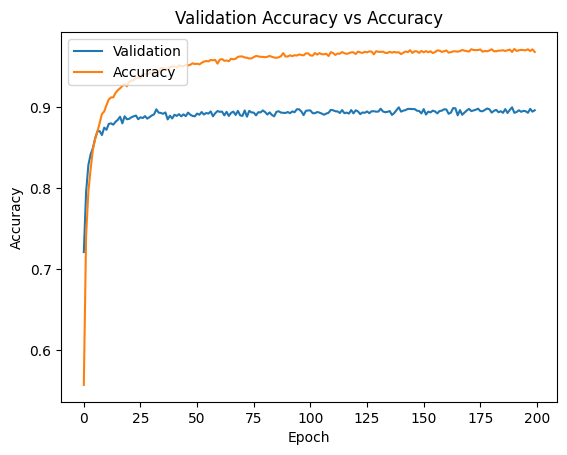

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Validation Accuracy vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Accuracy'], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(X_test)
y_test_1 = y_test.reset_index()
y_test_1.drop('index', axis = 1, inplace=True)

num = 0
for i in range(len(predict)):
    if np.argmax(np.array(y_test_1.loc[i])) == np.argmax(predict[i]):
        num += 1
num/len(predict)

163/163 [==============================] - 1s 3ms/step


0.9054496437512035

In [ ]:
from sklearn.metrics import classification_report
pred_ann = []
test_ann = []
for i in range(len(predict)):
     pred_ann.append(np.argmax(np.array(y_test_1.loc[i])))
     test_ann.append(np.argmax(predict[i]))

print("Classification Report: ")
print(classification_report(test_ann, pred_ann))

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        80
           1       0.78      1.00      0.88        25
           2       0.00      0.00      0.00         0
           3       0.68      1.00      0.81        13
           4       0.84      1.00      0.92        27
           5       0.00      0.00      0.00         0
           6       0.88      1.00      0.93         7
           7       0.93      1.00      0.97        14
           8       0.96      0.98      0.97        50
           9       0.94      0.99      0.96        92
          10       0.66      0.72      0.68        53
          11       0.91      0.91      0.91        54
          12       0.20      1.00      0.33         1
          13       0.78      0.84      0.81        68
          14       0.88      0.85      0.87       983
          15       0.84      0.95      0.89        22
          16       0.93      0.95      0.94       130
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(num_seq, encoded_dataframe, test_size = 0.2, random_state=42)

In [ ]:
# Load the data
x_train = X_train
y_train = y_train.values

# Define the number of folds
n_folds = 5

# Initialize the cross-validation folds
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Iterate through the folds
fold = 0
for train_index, val_index in kf.split(x_train):
    fold += 1
    print(f'Fold {fold}')

    # Get the training and validation data for this fold
    x_train_fold, y_train_fold = x_train[train_index], y_train[train_index]
    x_val_fold, y_val_fold = x_train[val_index], y_train[val_index]

    # Train the model on this fold
    history = model.fit(x_train_fold, y_train_fold, epochs=20, validation_data=(x_val_fold, y_val_fold))

Fold 1
Epoch 1/20
520/520 [==============================] - 5s 10ms/step - loss: 0.0831 - accuracy: 0.9684 - val_loss: 0.7405 - val_accuracy: 0.8934
Epoch 2/20
520/520 [==============================] - 5s 10ms/step - loss: 0.0849 - accuracy: 0.9684 - val_loss: 0.7178 - val_accuracy: 0.8926
Epoch 3/20
520/520 [==============================] - 5s 10ms/step - loss: 0.0823 - accuracy: 0.9702 - val_loss: 0.6898 - val_accuracy: 0.8960
Epoch 4/20
520/520 [==============================] - 7s 13ms/step - loss: 0.0817 - accuracy: 0.9696 - val_loss: 0.7813 - val_accuracy: 0.8970
Epoch 5/20
520/520 [==============================] - 5s 10ms/step - loss: 0.0794 - accuracy: 0.9712 - val_loss: 0.6849 - val_accuracy: 0.8958
Epoch 6/20
520/520 [==============================] - 5s 9ms/step - loss: 0.0823 - accuracy: 0.9717 - val_loss: 0.7030 - val_accuracy: 0.8967
Epoch 7/20
520/520 [==============================] - 5s 10ms/step - loss: 0.0769 - accuracy: 0.9721 - val_loss: 0.7545 - val_accuracy: 

In [ ]:
model.save("model_1_75_84.h5")